In [44]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

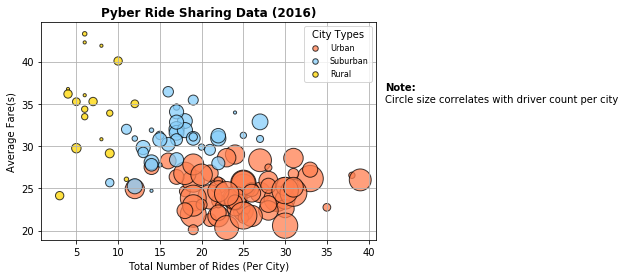

In [45]:
# Obtain the x and y coordinates for each of the three city types
#calculate total rides per city
city_num_of_rides_gb = city_ride_data.groupby(['city'])
city_num_of_rides = pd.DataFrame(city_num_of_rides_gb["date"].count())
city_num_of_rides.rename(columns={'date': 'Total Rides'}, inplace=True)

#calculate ave fare per ciy
ave_fare_gb = city_ride_data.groupby(['city'])
ave_fare = pd.DataFrame(ave_fare_gb["fare"].mean())
ave_fare.rename(columns={'fare': 'Average Fare'}, inplace=True)

#Remove duplicate rows to get the total drivers and city type data 
city_ride_data_noDups = city_ride_data.drop_duplicates("city")
#create dataframe for total drivers
total_drivers = pd.DataFrame(city_ride_data_noDups[["city","driver_count"]])
total_drivers.rename(columns={'driver_count': 'Number of Drivers'}, inplace=True)

#create city type dataframe
city_type = pd.DataFrame(city_ride_data_noDups[["city", "type"]])

#Merge dataframes togheter
bubble_plot_data1 = pd.merge(city_num_of_rides, ave_fare, on="city", how="left")
bubble_plot_data2 = pd.merge(bubble_plot_data1, total_drivers, on="city", how="left")
bubble_plot_data3 = pd.merge(bubble_plot_data2, city_type, on="city", how="left")


#extract the data for only urban cities 
urban = bubble_plot_data3.loc[bubble_plot_data3["type"] == "Urban", :]
#extract the data for only suburban cities 
suburban = bubble_plot_data3.loc[bubble_plot_data3["type"] == "Suburban", :]
#extract the data for only rural cities 
rural = bubble_plot_data3.loc[bubble_plot_data3["type"] == "Rural", :]

# Build the scatter plots for each city types
plt.scatter(urban['Total Rides'], urban['Average Fare'],s=(urban['Number of Drivers']*10), marker="o", color="coral", edgecolors="black", alpha = .75, label='Urban')
plt.scatter(suburban['Total Rides'], suburban['Average Fare'],s=(suburban['Number of Drivers']*10), marker="o", color="lightskyblue", edgecolors="black", alpha = .75, label='Suburban')
plt.scatter(rural['Total Rides'], rural['Average Fare'],s=(rural['Number of Drivers']*10), color="gold", marker="o", edgecolors="black", alpha = .75, label='Rural')

# Incorporate the other graph properties
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)", fontweight="bold")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(s)")

# Create a legend
lgnd = plt.legend(loc='upper right', title='City Types', fontsize = 8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,37, 'Note:', horizontalalignment='left', verticalalignment='center', fontsize = 10, fontweight="bold")
plt.text(42,35.5, 'Circle size correlates with driver count per city', horizontalalignment='left', verticalalignment='center', fontsize = 10)

# Save Figure
plt.savefig('Pyber.png', bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

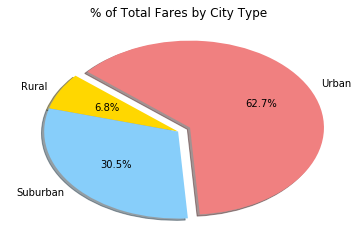

In [46]:
#calculate Type Percents
#calculate fare for each city type and put them in a list 
total_rural = city_ride_data.loc[city_ride_data["type"] == "Rural", :]
total_rural_fare = total_rural['fare'].sum()
total_urban = city_ride_data.loc[city_ride_data["type"] == "Urban", :]
total_urban_fare = total_urban['fare'].sum()
total_suburban = city_ride_data.loc[city_ride_data["type"] == "Suburban", :]
total_suburban_fare = total_suburban['fare'].sum()
fare_list = [total_rural_fare, total_suburban_fare, total_urban_fare]

#Create Chart components 
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,.1)

# Build Pie Chart
plt.pie(fare_list, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#add title
plt.title('% of Total Fares by City Type')
plt.axis('off')

# Save Figure
plt.savefig('Pie1.png', bbox_inches="tight")

#Show Plot
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


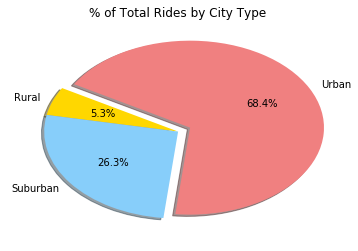

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


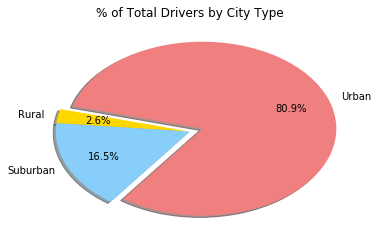

In [6]:
# Show Figure
plt.show()